In [4]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
import pandas as pd

/home/mc741/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


## Read tables

In [2]:
cat=Table.read('data/dmu26_XID+MIPS_HDF-N_cat.fits')

## Look at Symmetry of PDFs to determine depth level of catalogue

2.7165594


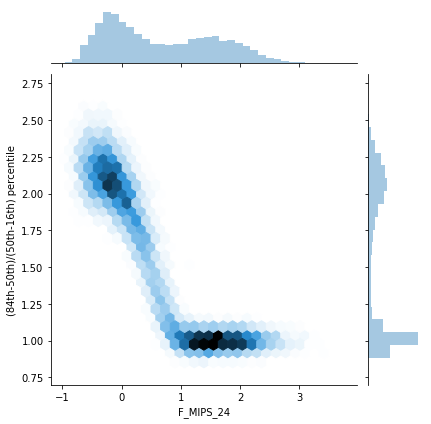

In [3]:
import seaborn as sns
skew=(cat['FErr_MIPS_24_u']-cat['F_MIPS_24'])/(cat['F_MIPS_24']-cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))


Both seem to have flux pdfs that become Gaussian at ~6$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [4]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


In [5]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 6.0)

In [6]:
cat['flag_mips_24'][ind]=True


In [7]:
cat.write('./data/dmu26_XID+MIPS_HDF-N_cat_20190312.fits', format='fits',overwrite=True)

### Check Map


In [1]:
from astropy.io import fits
import pylab as plt

In [2]:
MIPS_pval=fits.open('./data/dmu26_XID+MIPS_HDF-N_Bayes_Pval.fits')


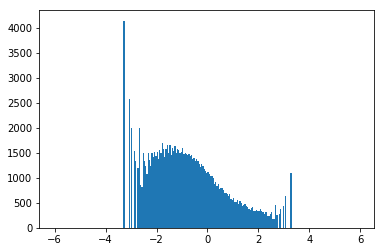

In [12]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));

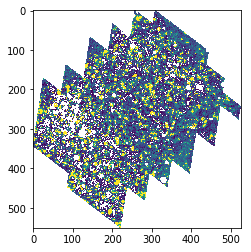

In [14]:
plt.imshow(MIPS_pval[1].data)

In [16]:
priors,posterior=xidplus.load('./data/.pkl')

FileNotFoundError: [Errno 2] No such file or directory: './data/.pkl'